<a href="https://colab.research.google.com/github/anggerharyo/Proyek-Analisis-Data_Angger-Haryo-Putranto/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Angger Haryo Putranto
- **Email:** m283b4ky0550@bangkit.academy
- **ID Dicoding:** anggerharyo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah faktor cuaca seperti suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penggunaan sepeda harian?
- Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [90]:
# Mengimpor library yang dibutuhkan untuk analisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


## Data Wrangling

### Gathering Data

In [92]:
# Membaca dataset
df_day = pd.read_csv('/content/drive/MyDrive/day.csv')

In [93]:
# Menampilkan beberapa baris pertama dari dataset day.csv untuk memahami strukturnya
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Setelah proses memahami struktur dari dataset tersebut, dapat diberikan penjelasan bahwa Day.csv merupakan data penggunaan sepeda berdasarkan hari. Dataset day.csv berisi 731 baris dan 16 kolom. Kolom-kolom penting di dalam dataset ini antara lain:
 - instant: Indeks unik/indeks yang terekam/nomor urut untuk setiap baris dalam dataset.
 - season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
 - yr: Tahun (0: 2011, 1: 2012).
 - mnth: Bulan (1 - 12).
 - holiday: Hari libur (0: tidak libur, 1: libur).
 - weekday: Hari dalam minggu (0 - 6, di mana 0 adalah Minggu).
 - workingday: Hari kerja (0: bukan hari kerja, 1: hari kerja).
 - weathersit: Situasi cuaca (1: cerah, 2: berawan, 3: hujan ringan, 4: hujan lebat).
 - temp: Suhu normalisasi.
 - atemp: Suhu yang dirasakan.
 - hum: Kelembaban.
 - windspeed: Kecepatan angin.
 - casual: Jumlah pengguna casual.
 - registered: Jumlah pengguna terdaftar.
 - cnt: Total jumlah peminjaman sepeda.

### Assessing Data

#### Menilai tabel 'df_day'

In [94]:
# Cek informasi dataset day.csv
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [95]:
# Mengecek nilai yang hilang/missing values di setiap kolom
missing_values = df_day.isnull().sum()
print("Nilai yang hilang dalam setiap kolom:")
print(missing_values)

Nilai yang hilang dalam setiap kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [96]:
# Mengecek kolom apakah ada duplikasi data
print(df_day.duplicated().sum())

0


In [97]:
# Tampilkan beberapa info statistik tentang dataset
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [98]:
# Cek outliers pada kolom 'cnt' menggunakan IQR Method
# Menghitung Q1 dan Q3 untuk kolom 'cnt'
Q1 = df_day['cnt'].quantile(0.25)
Q3 = df_day['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier pada kolom target 'cnt'
outliers = df_day[(df_day['cnt'] < lower_bound) | (df_day['cnt'] > upper_bound)]

# Menampilkan jumlah dan data outlier
print(f'Jumlah outlier pada kolom "cnt": {len(outliers)}')
print(outliers)


Jumlah outlier pada kolom "cnt": 0
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [99]:
# Mengecek apakah ada inaccurate data
# Menghitung nilai negatif pada kolom target 'cnt'
invalid_cnt = df_day[df_day['cnt'] < 0]
print(f"Jumlah nilai 'cnt' yang tidak akurat (negatif): {len(invalid_cnt)}")

Jumlah nilai 'cnt' yang tidak akurat (negatif): 0


In [100]:
# Menghitung baris dengan kombinasi yang tidak sesuai antara 'workingday' dan 'holiday'
invalid_logic = df_day[(df_day['workingday'] == 1) & (df_day['holiday'] == 1)]
print(f"Jumlah baris dengan kombinasi 'workingday' dan 'holiday' yang tidak sesuai: {len(invalid_logic)}")

Jumlah baris dengan kombinasi 'workingday' dan 'holiday' yang tidak sesuai: 0


**Insight:**
- Dalam proses assessing data, tidak ditemukan nilai yang hilang/missing values, tidak ada inaccurate data, tidak ada outliers juga didalam kolom target data.
- Sebagian besar variabel sudah memiliki tipe data yang sesuai (integer dan float), kecuali kolom dteday yang bertipe object tetapi bisa diubah ke tipe datetime untuk mendapatkan analisis statistik deskriptif dari kolom-kolom numerik dalam DataFrame.

### Cleaning Data

In [101]:
# Cek informasi data
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [102]:
# Mengubah tipe data pada 'dteday' ke format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Cek data setelah diubah
print(df_day.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [103]:
# Cek kembali data setelah perubahan
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [104]:
# Tampilkan beberapa info statistik tentang dataset
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Dalam proses ini, mengubah tipe data dari kolom 'dteday' yang bertipe object menjadi tipe datetime untuk mendapatkan analisis statistik deskriptif dari kolom-kolom numerik dalam DataFrame.


## Exploratory Data Analysis (EDA)

### Explore df_day

In [105]:
# Menampilkan deskripsi statistik dari dataset
print(df_day.describe(include="all"))

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [106]:
# Tampilkan 10 baris sampel acak data pada df_day
df_day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
212,213,2011-08-01,3,0,8,0,1,1,1,0.771667,0.703292,0.550833,0.156717,729,3537,4266
99,100,2011-04-10,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188,1707,2895
528,529,2012-06-12,2,1,6,0,2,1,2,0.653333,0.597875,0.833333,0.214546,477,4495,4972
160,161,2011-06-10,2,0,6,0,5,1,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132
572,573,2012-07-26,3,1,7,0,4,1,1,0.776667,0.739263,0.596667,0.284813,1036,5825,6861
133,134,2011-05-14,2,0,5,0,6,0,2,0.520833,0.500629,0.922500,0.134950,902,2507,3409
228,229,2011-08-17,3,0,8,0,3,1,1,0.723333,0.666671,0.575417,0.143667,668,4026,4694
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
517,518,2012-06-01,2,1,6,0,5,1,2,0.654167,0.607962,0.755417,0.237563,533,3594,4127


In [107]:
#  Menampilkan jumlah nilai unik yang ada di setiap kolom dalam df_day
for col in df_day.columns:
    print(f"Kolom {col} memiliki: ",end='')
    print(len(df_day[col].unique()),'unique values\n')

Kolom instant memiliki: 731 unique values

Kolom dteday memiliki: 731 unique values

Kolom season memiliki: 4 unique values

Kolom yr memiliki: 2 unique values

Kolom mnth memiliki: 12 unique values

Kolom holiday memiliki: 2 unique values

Kolom weekday memiliki: 7 unique values

Kolom workingday memiliki: 2 unique values

Kolom weathersit memiliki: 3 unique values

Kolom temp memiliki: 499 unique values

Kolom atemp memiliki: 690 unique values

Kolom hum memiliki: 595 unique values

Kolom windspeed memiliki: 650 unique values

Kolom casual memiliki: 606 unique values

Kolom registered memiliki: 679 unique values

Kolom cnt memiliki: 696 unique values



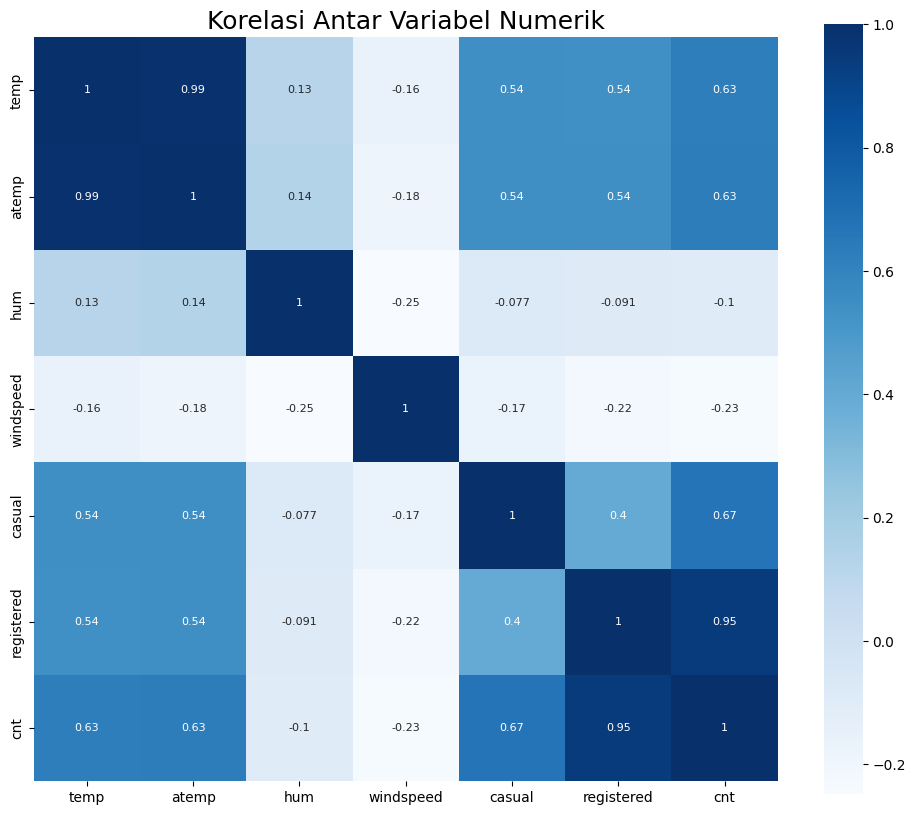

In [108]:
# Menemukan korelasi antara semua fitur dataset
correlation_values = df_day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size': 8},cmap='Blues')

# Menambahkan judul
plt.title('Korelasi Antar Variabel Numerik', fontsize=18)

# Menampilkan heatmap
plt.show()

**Insight:**
- Dataset df_day memiliki variasi nilai dalam fitur yang beragam. Statistik seperti mean, min, max, dan quartiles memberikan gambaran tentang distribusi dan rentang nilai di setiap kolom.
- Menampilkan heatmap untuk mengetahui korelasi antar variabel numerik yang nantinya akan membantu dalam menjawab pertanyaan bisnis.
- Setiap kolom memiliki jumlah nilai unik yang berbeda, menunjukkan bahwa ada fitur kategori (seperti season, weekday, dll.) dan fitur numerik yang memberikan informasi berharga mengenai penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah faktor cuaca seperti suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penggunaan sepeda harian?

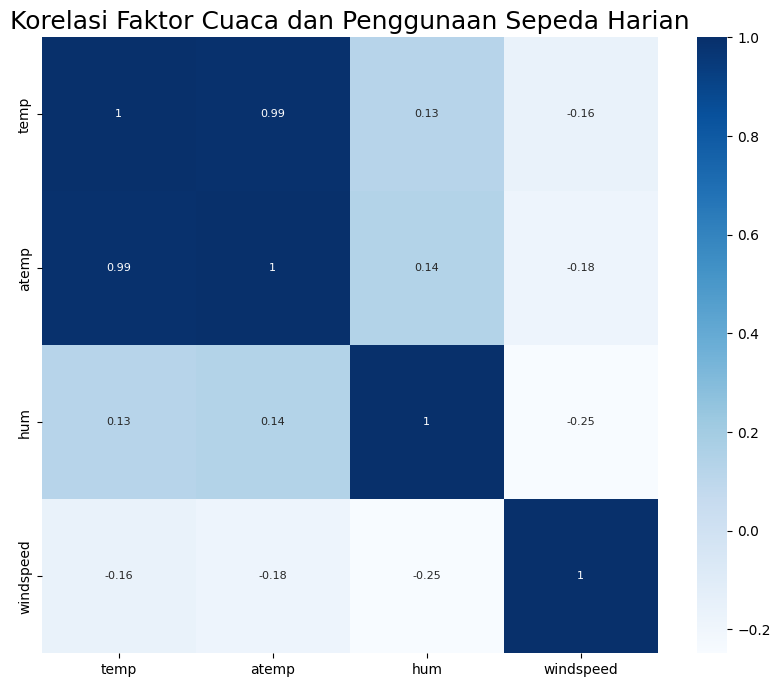

In [109]:
# Menemukan korelasi antara semua fitur dataset
correlation_values = df_day[['temp', 'atemp', 'hum', 'windspeed']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size': 8},cmap='Blues')

# Menambahkan judul
plt.title('Korelasi Faktor Cuaca dan Penggunaan Sepeda Harian', fontsize=18)

# Menampilkan heatmap
plt.show()

**Insight:**
- Dari hasil korelasi, suhu (temp) memiliki hubungan positif yang kuat dengan jumlah pengguna sepeda. Artinya, semakin tinggi suhu, semakin banyak pengguna sepeda.
-Kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif yang lemah terhadap jumlah pengguna sepeda.

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan akhir pekan?

Rata-rata penggunaan sepeda pada Hari Kerja: 4584
Rata-rata penggunaan sepeda pada Akhir Pekan: 4330


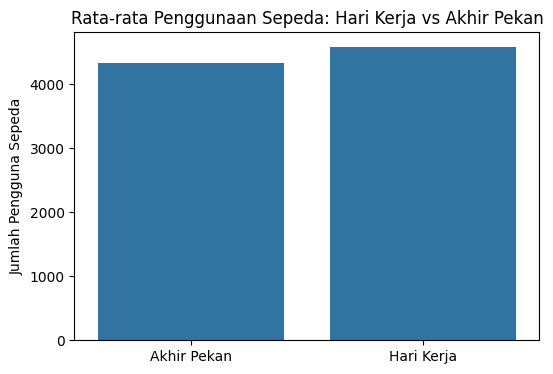

In [110]:
# Membandingkan penggunaan sepeda pada hari kerja dan akhir pekan
workingday_usage = df_day.groupby('workingday')['cnt'].mean()

# Menampilkan nilai rata-rata
# Menampilkan nilai rata-rata tanpa desimal
print(f"Rata-rata penggunaan sepeda pada Hari Kerja: {int(workingday_usage[1])}")
print(f"Rata-rata penggunaan sepeda pada Akhir Pekan: {int(workingday_usage[0])}")


# Visualisasi pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(6,4))
sns.barplot(x=['Akhir Pekan', 'Hari Kerja'], y=workingday_usage.values)
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


**Insight:**
- Rata-rata penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan bekerja.

## Analisis Lanjutan (Opsional)

### Clustering

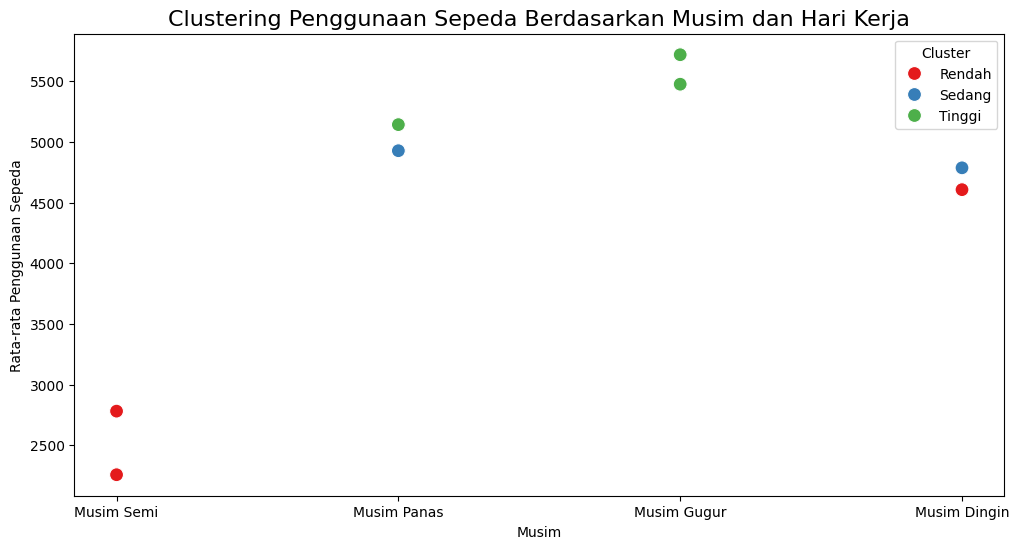

         season  workingday   cnt Cluster
0    Musim Semi           0  2257  Rendah
1    Musim Semi           1  2781  Rendah
2   Musim Panas           0  5142  Tinggi
3   Musim Panas           1  4927  Sedang
4   Musim Gugur           0  5475  Tinggi
5   Musim Gugur           1  5718  Tinggi
6  Musim Dingin           0  4606  Rendah
7  Musim Dingin           1  4786  Sedang


In [111]:
# Menyiapkan data untuk clustering sederhana
usage_summary = df_day.groupby(['season', 'workingday']).agg({
    'cnt': 'mean'
}).reset_index()

# Mengubah season menjadi label keterangan
season_labels = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
usage_summary['season'] = usage_summary['season'].map(season_labels)

# Menentukan kategori berdasarkan rata-rata penggunaan sepeda
usage_summary['Cluster'] = pd.qcut(usage_summary['cnt'], q=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# Mengubah 'cnt' menjadi nilai integer
usage_summary['cnt'] = usage_summary['cnt'].round().astype(int)  # Membulatkan ke integer

# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=usage_summary, x='season', y='cnt', hue='Cluster', palette='Set1', s=100)
plt.title('Clustering Penggunaan Sepeda Berdasarkan Musim dan Hari Kerja', fontsize=16)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.legend(title='Cluster')
plt.show()

# Menampilkan hasil summary
print(usage_summary)


**Insight:**
- Penggunaan sepeda berdasarkan musim:
 - Musim Panas:
Rata-rata penggunaan sepeda tertinggi terjadi pada musim panas, dengan nilai cnt mencapai 5142 pada akhir pekan dan 4927 pada hari kerja. Hal ini menunjukkan bahwa pada musim panas, orang lebih cenderung menggunakan sepeda, mungkin karena cuaca yang lebih baik dan lebih banyak aktivitas luar ruangan.
 - Musim Gugur:
Penggunaan sepeda juga tinggi pada musim gugur, dengan nilai cnt sebesar 5475 (akhir pekan) dan 5718 (hari kerja). Hal ini menunjukkan bahwa meskipun cuaca mulai dingin, penggunaan sepeda masih cukup tinggi, mungkin karena aktivitas seperti bersepeda untuk olahraga.
 - Musim Semi:
Rata-rata penggunaan sepeda terendah ditemukan di musim semi dan musim dingin. Pada musim semi, penggunaan sepeda adalah 2257 (akhir pekan) dan 2781 (hari kerja)
 - Musim Dingin:
 Pada musim dingin, angka penggunaan sepeda mencapai 4606 pada akhir pekan dan 4786 pada hari kerja. Meskipun angka ini lebih tinggi dibandingkan dengan musim semi, penggunaan sepeda di musim dingin masih tergolong rendah jika dibandingkan dengan musim panas dan gugur, yang menunjukkan bahwa cuaca yang lebih hangat dan kondisi lingkungan yang lebih baik cenderung mendorong penggunaan sepeda yang lebih tinggi.

- Secara umum, penggunaan sepeda di akhir pekan lebih rendah dibandingkan dengan hari kerja pada musim panas dan gugur. Namun, musim semi menunjukkan nilai yang jauh lebih rendah pada akhir pekan.
Untuk musim dingin, meskipun hari kerja sedikit lebih tinggi, rata-rata penggunaan sepeda pada akhir pekan juga tidak dapat dianggap rendah, dibandingkan dengan musim semi.

- Klasifikasi Cluster:
 - Cluster 'Rendah': Terlihat pada musim semi dan musim dingin, khususnya pada akhir pekan, di mana penggunaan sepeda jauh lebih rendah.
 - Cluster 'Sedang' dan 'Tinggi': Didominasi oleh musim panas dan gugur, di mana penggunaan sepeda lebih aktif. Ini bisa menjadi indikasi bahwa kebijakan promosi atau acara bersepeda dapat lebih difokuskan pada waktu-waktu ini untuk meningkatkan peminjaman sepeda.


## Conclusion

- Conclution pertanyaan 1:
 - Dari analisis yang dilakukan, terlihat bahwa faktor cuaca seperti suhu, kelembapan, dan kecepatan angin memiliki pengaruh signifikan terhadap jumlah penggunaan sepeda harian. Misalnya, suhu yang lebih tinggi dan kelembapan yang lebih rendah cenderung meningkatkan jumlah peminjaman sepeda. Sebaliknya, kondisi cuaca buruk, dapat mengurangi minat masyarakat untuk menggunakan sepeda. Korelasi yang ditemukan dalam analisis menunjukkan bahwa suhu dan kelembapan memiliki hubungan positif dengan penggunaan sepeda, sedangkan kecepatan angin memiliki dampak yang lebih kompleks. Dari kesimpulan ini,  Melihat tingginya penggunaan sepeda pada musim panas dan gugur, pengelola sistem sharing bike mungkin dapat melakukan promosi dan acara khusus di musim ini untuk lebih meningkatkan minat masyarakat terhadap penggunaan sepeda.

- Conclution pertanyaan 2:
 - Dari hasil analisis juga menunjukkan perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan. Rata-rata penggunaan sepeda pada hari kerja lebih tinggi dibandingkan dengan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi di hari kerja, mungkin karena penggunaan sepeda untuk commuting, sedangkan pada akhir pekan, pengguna mungkin lebih cenderung untuk beraktivitas rekreasi. Namun, dalam beberapa musim tertentu, seperti musim panas, penggunaan sepeda pada akhir pekan dapat meningkat, mencerminkan perilaku pengguna yang mencari kegiatan di luar ruangan.